In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow.keras.backend as K
import os
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

X = df[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df['Yield'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def build_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(8, 4)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

best_r2 = -np.inf
best_model = None

for i in range(10):
    print(f"\n Run {i+1}/10: Training new random model...")
    K.clear_session()

    model = build_model()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
        verbose=0
    )

    y_pred = model.predict(X_val).flatten()
    r2 = r2_score(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred)
    s = smape(y_val, y_pred)

    print(f" R² = {r2:.4f}, RMSE = {rmse:.4f}, SMAPE = {s:.2f}%")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        print(" New BEST model found! Saving...")
        model.save_weights("best_weight.weights.h5")

print(f"\n Finished 10 runs. Best R² = {best_r2:.4f} (saved as best_model.h5)")



 Run 1/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
 R² = 0.6322, RMSE = 0.3378, SMAPE = 89.77%
 New BEST model found! Saving...

 Run 2/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
 R² = 0.6273, RMSE = 0.3423, SMAPE = 90.17%

 Run 3/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
 R² = 0.6459, RMSE = 0.3252, SMAPE = 86.10%
 New BEST model found! Saving...

 Run 4/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
 R² = 0.6850, RMSE = 0.2893, SMAPE = 84.60%
 New BEST model found! Saving...

 Run 5/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
 R² = 0.6285, RMSE = 0.3411, SMAPE = 91.96%

 Run 6/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 R² = 0.6141, RMSE = 0.3543, SMAPE = 93.43%

 Run 7/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 R² = 0.6901, RMSE = 0.2845, SMAPE = 83.76%
 New BEST model found! Saving...

 Run 8/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
 R² = 0.6538, RMSE = 0.3179, SMAPE = 82.69%

 Run 9/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
 R² = 0.5102, RMSE = 0.4498, SMAPE = 98.44%

 Run 10/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
 R² = 0.6229, RMSE = 0.3463, SMAPE = 89.40%

 Finished 10 runs. Best R² = 0.6901 (saved as best_model.h5)


optimizing

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
import optuna

df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

X = df[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df['Yield'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# SMAPE
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def build_model(lstm_units=64, dropout=0.3, batch_size=32):
    model = Sequential()
    model.add(LSTM(lstm_units, return_sequences=True, input_shape=(8, 4)))
    model.add(Dropout(dropout))
    model.add(LSTM(int(lstm_units/2)))
    model.add(Dropout(dropout/2))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

# Optuna 调参目标函数
def objective(trial):
    K.clear_session()
    lstm_units = trial.suggest_categorical("lstm_units", [32, 64, 128])
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = build_model(lstm_units, dropout, batch_size)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=200,
        batch_size=batch_size,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=0
    )

    # 预测并评估
    y_pred = model.predict(X_val).flatten()
    r2 = r2_score(y_val, y_pred)
    return -r2  # Optuna 最小化，所以取负值

# 启动 Optuna 调参
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# 输出最优参数
print("\n Optuna 最佳参数：", study.best_params)

# 使用最佳参数训练并评估模型
best_params = study.best_params
best_model = build_model(best_params['lstm_units'], best_params['dropout'], best_params['batch_size'])

# 训练最佳模型
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,  # 确保训练更长时间
    batch_size=best_params['batch_size'],
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=0
)

# 保存最佳模型
best_model.save("best_model_optuna.h5")

# 评估最佳模型
y_pred = best_model.predict(X_val).flatten()
print("\n 最佳模型评估结果：")
print("R²:", r2_score(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred))
print("SMAPE:", smape(y_val, y_pred))


[I 2025-04-17 19:40:15,831] A new study created in memory with name: no-name-d2232fc0-206b-46fc-8750-c95eb7f330ad
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2025-04-17 19:40:46,417] Trial 0 finished with value: -0.5022999304648357 and parameters: {'lstm_units': 128, 'dropout': 0.17842480000527347, 'batch_size': 64}. Best is trial 0 with value: -0.5022999304648357.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-04-17 19:40:55,125] Trial 1 finished with value: -0.35737463759466515 and parameters: {'lstm_units': 64, 'dropout': 0.4278452935868089, 'batch_size': 16}. Best is trial 0 with value: -0.5022999304648357.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-04-17 19:41:14,467] Trial 2 finished with value: -0.5034401997630926 and parameters: {'lstm_units': 64, 'dropout': 0.4943354863971918, 'batch_size': 16}. Best is trial 2 with value: -0.5034401997630926.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2025-04-17 19:41:27,651] Trial 3 finished with value: -0.4494865929722275 and parameters: {'lstm_units': 32, 'dropout': 0.2904014714153751, 'batch_size': 64}. Best is trial 2 with value: -0.5034401997630926.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-04-17 19:41:38,396] Trial 4 finished with value: -0.3402762886909261 and parameters: {'lstm_units': 128, 'dropout': 0.23296135206944177, 'batch_size': 64}. Best is trial 2 with value: -0.5034401997630926.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-04-17 19:41:47,888] Trial 5 finished with value: -0.3848559104659234 and parameters: {'lstm_units': 64, 'dropout': 0.2433854531351221, 'batch_size': 16}. Best is trial 2 with value: -0.5034401997630926.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-04-17 19:42:14,433] Trial 6 finished with value: -0.5331647723066584 and parameters: {'lstm_units': 128, 'dropout': 0.35834901288436083, 'batch_size': 16}. Best is trial 6 with value: -0.5331647723066584.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-04-17 19:42:22,925] Trial 7 finished with value: -0.383883230793697 and parameters: {'lstm_units': 32, 'dropout': 0.4522191018049079, 'batch_size': 64}. Best is trial 6 with value: -0.5331647723066584.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2025-04-17 19:42:32,650] Trial 8 finished with value: -0.3920873332690449 and parameters: {'lstm_units': 32, 'dropout': 0.30421594214122305, 'batch_size': 16}. Best is trial 6 with value: -0.5331647723066584.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-17 19:42:42,352] Trial 9 finished with value: -0.31400468037256124 and parameters: {'lstm_units': 128, 'dropout': 0.2523130512165322, 'batch_size': 64}. Best is trial 6 with value: -0.5331647723066584.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



 Optuna 最佳参数： {'lstm_units': 128, 'dropout': 0.35834901288436083, 'batch_size': 16}


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

 最佳模型评估结果：
R²: 0.3801311102600219
RMSE: 0.5692081880751358
SMAPE: 107.09622618582517


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow.keras.backend as K
import os
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

X = df[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df['Yield'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def build_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(8, 4)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

best_r2 = -np.inf
best_model = None

for i in range(10):
    print(f"\n🔁 Run {i+1}/10: Training new random model...")
    K.clear_session()

    model = build_model()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
        verbose=0
    )

    y_pred = model.predict(X_val).flatten()
    r2 = r2_score(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred)
    s = smape(y_val, y_pred)

    print(f"➡ R² = {r2:.4f}, RMSE = {rmse:.4f}, SMAPE = {s:.2f}%")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        print("✨ New BEST model found! Saving...")
        model.save_weights("best_weight.weights.h5")

print(f"\n✅ Finished 10 runs. Best R² = {best_r2:.4f} (saved as best_model.h5)")




🔁 Run 1/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
➡ R² = 0.6548, RMSE = 0.3170, SMAPE = 88.25%
✨ New BEST model found! Saving...

🔁 Run 2/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
➡ R² = 0.6061, RMSE = 0.3617, SMAPE = 95.31%

🔁 Run 3/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
➡ R² = 0.5509, RMSE = 0.4124, SMAPE = 90.59%

🔁 Run 4/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
➡ R² = 0.6352, RMSE = 0.3350, SMAPE = 86.37%

🔁 Run 5/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
➡ R² = 0.6236, RMSE = 0.3456, SMAPE = 88.93%

🔁 Run 6/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
➡ R² = 0.6484, RMSE = 0.3229, SMAPE = 83.75%

🔁 Run 7/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
➡ R² = 0.6643, RMSE = 0.3083, SMAPE = 88.22%
✨ New BEST model found! Saving...

🔁 Run 8/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
➡ R² = 0.6695, RMSE = 0.3035, SMAPE = 91.23%
✨ New BEST model found! Saving...

🔁 Run 9/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
➡ R² = 0.6589, RMSE = 0.3132, SMAPE = 88.60%

🔁 Run 10/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
➡ R² = 0.6387, RMSE = 0.3318, SMAPE = 88.88%

✅ Finished 10 runs. Best R² = 0.6695 (saved as best_model.h5)


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
import optuna
import os

# ========== 数据准备 ==========
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

X = df[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df['Yield'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== SMAPE 函数 ==========
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# ========== RMSE 函数 ==========
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# ========== 模型构建函数 ==========
def build_model(lstm_units=64, dropout=0.3, learning_rate=0.01):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(8, 4)))
    model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# ========== Optuna 调参目标函数 ==========
def objective(trial):
    K.clear_session()

    lstm_units = trial.suggest_categorical("lstm_units", [64])
    dropout = trial.suggest_float("dropout", 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    model = build_model(lstm_units, dropout, learning_rate)

    # 加载之前训练的最佳权重
    if os.path.exists("best_weights.h5"):
        model.load_weights("best_weights.h5")

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
        verbose=0
    )

    y_pred = model.predict(X_val).flatten()

    rmse_value = rmse(y_val, y_pred)
    smape_value = smape(y_val, y_pred)

    # 选择一个目标作为优化标准
    return rmse_value

# ========== 开始调参 ==========
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("\n Optuna 最佳参数：", study.best_params)

# ========== 评估最佳模型 ==========
best_model = build_model(**study.best_params)
best_model.load_weights("/content/best_weight.weights.h5")

y_pred = best_model.predict(X_val).flatten()

print("\n 最佳模型评估指标：")
print("R²:", r2_score(y_val, y_pred))
print("RMSE:", rmse(y_val, y_pred))
print("SMAPE:", smape(y_val, y_pred))



[I 2025-04-16 18:28:42,819] A new study created in memory with name: no-name-e8f18f6f-06ba-4aa2-b5a0-03e2fed7a311
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2025-04-16 18:29:33,480] Trial 0 finished with value: 0.727551478798672 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.00017137451604844453}. Best is trial 0 with value: 0.727551478798672.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-04-16 18:30:07,510] Trial 1 finished with value: 0.6349043459690139 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0074232315554316995}. Best is trial 1 with value: 0.6349043459690139.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2025-04-16 18:30:54,339] Trial 2 finished with value: 0.6489542427102577 and parameters: {'lstm_units': 64, 'dropout': 0.30000000000000004, 'learning_rate': 0.0012631030583870279}. Best is trial 1 with value: 0.6349043459690139.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-04-16 18:31:40,385] Trial 3 finished with value: 0.6567736241263334 and parameters: {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.004173480170800036}. Best is trial 1 with value: 0.6349043459690139.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-16 18:32:26,881] Trial 4 finished with value: 0.7158365491611061 and parameters: {'lstm_units': 64, 'dropout': 0.30000000000000004, 'learning_rate': 0.0006097690798405777}. Best is trial 1 with value: 0.6349043459690139.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-04-16 18:33:13,669] Trial 5 finished with value: 0.721738032923623 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0003769023903681017}. Best is trial 1 with value: 0.6349043459690139.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2025-04-16 18:33:58,468] Trial 6 finished with value: 0.6863099958732953 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0010209329585733438}. Best is trial 1 with value: 0.6349043459690139.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


[I 2025-04-16 18:34:40,072] Trial 7 finished with value: 0.728699142106177 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0002342007577212817}. Best is trial 1 with value: 0.6349043459690139.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2025-04-16 18:35:27,234] Trial 8 finished with value: 0.7096008905969464 and parameters: {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.0011014763592962075}. Best is trial 1 with value: 0.6349043459690139.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


[I 2025-04-16 18:36:14,751] Trial 9 finished with value: 0.6573641415621334 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0014255276689026876}. Best is trial 1 with value: 0.6349043459690139.



 Optuna 最佳参数： {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0074232315554316995}


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

 最佳模型评估指标：
R²: 0.6694638674603657
RMSE: 0.5509283484097126
SMAPE: 91.23331071941675



🔁 Run 1/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
➡ R² = 0.6055, RMSE = 0.2460, SMAPE = 32.67%
✨ New BEST model found! Saving...

🔁 Run 2/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
➡ R² = 0.6127, RMSE = 0.2415, SMAPE = 31.81%
✨ New BEST model found! Saving...

🔁 Run 3/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
➡ R² = 0.6657, RMSE = 0.2085, SMAPE = 29.49%
✨ New BEST model found! Saving...

🔁 Run 4/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
➡ R² = 0.5834, RMSE = 0.2598, SMAPE = 32.14%

🔁 Run 5/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
➡ R² = 0.5373, RMSE = 0.2885, SMAPE = 33.65%

🔁 Run 6/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
➡ R² = 0.5639, RMSE = 0.2719, SMAPE = 34.07%

🔁 Run 7/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
➡ R² = 0.5499, RMSE = 0.2806, SMAPE = 34.01%

🔁 Run 8/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
➡ R² = 0.6358, RMSE = 0.2271, SMAPE = 30.85%

🔁 Run 9/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
➡ R² = 0.6199, RMSE = 0.2370, SMAPE = 32.15%

🔁 Run 10/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-04-27 21:36:03,394] A new study created in memory with name: no-name-73d99265-ff34-46dd-8ac2-58f08cca7116


➡ R² = 0.5476, RMSE = 0.2821, SMAPE = 33.74%

✅ Finished 10 runs. Best R² = 0.6657 (saved as best_model.h5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


[I 2025-04-27 21:36:48,383] Trial 0 finished with value: 0.5621314153791979 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0005060196400044487}. Best is trial 0 with value: 0.5621314153791979.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-27 21:37:33,749] Trial 1 finished with value: 0.5808152358263734 and parameters: {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.0001489251526319142}. Best is trial 0 with value: 0.5621314153791979.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


[I 2025-04-27 21:38:23,529] Trial 2 finished with value: 0.5442845242897546 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0008411148886518637}. Best is trial 2 with value: 0.5442845242897546.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2025-04-27 21:39:12,183] Trial 3 finished with value: 0.49364337143183346 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.008860188647579415}. Best is trial 3 with value: 0.49364337143183346.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[I 2025-04-27 21:39:36,749] Trial 4 finished with value: 0.5632611038590015 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.0011935064461559438}. Best is trial 3 with value: 0.49364337143183346.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


[I 2025-04-27 21:40:18,264] Trial 5 finished with value: 0.5210065472219167 and parameters: {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.008312318358439395}. Best is trial 3 with value: 0.49364337143183346.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


[I 2025-04-27 21:41:04,309] Trial 6 finished with value: 0.5626468448684221 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0003426896817850462}. Best is trial 3 with value: 0.49364337143183346.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-27 21:41:50,588] Trial 7 finished with value: 0.4884623936625581 and parameters: {'lstm_units': 64, 'dropout': 0.30000000000000004, 'learning_rate': 0.00722411803142197}. Best is trial 7 with value: 0.4884623936625581.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-04-27 21:42:40,157] Trial 8 finished with value: 0.48816655163964967 and parameters: {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.005575746431323324}. Best is trial 8 with value: 0.48816655163964967.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


[I 2025-04-27 21:43:18,419] Trial 9 finished with value: 0.5638690883926367 and parameters: {'lstm_units': 64, 'dropout': 0.30000000000000004, 'learning_rate': 0.00048022131821988775}. Best is trial 8 with value: 0.48816655163964967.



 Optuna 最佳参数： {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.005575746431323324}
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

 最佳模型评估指标：
R²: 0.6656598995361471
RMSE: 0.456583548395974
SMAPE: 29.493673552225246
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Baseline RMSE: 0.456583548395974
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

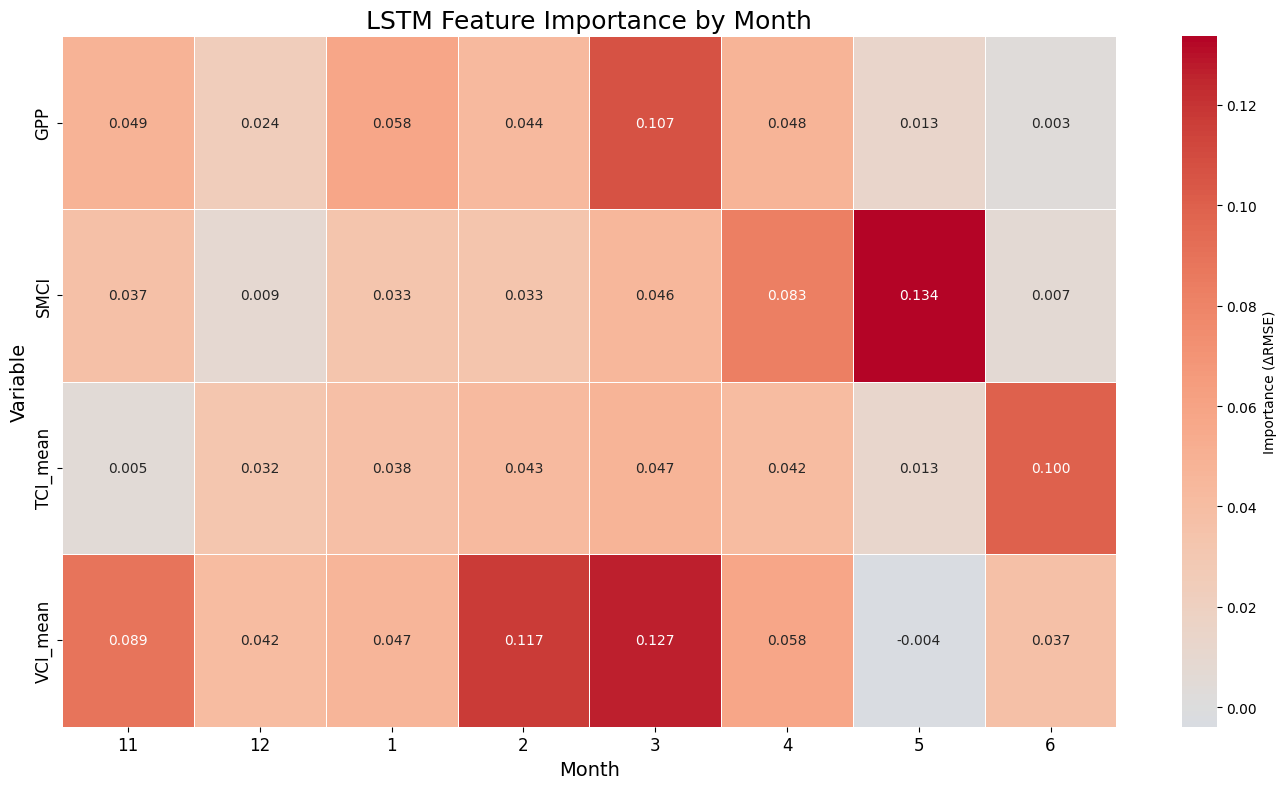

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow.keras.backend as K
import os
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

X = df[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df['Drought_Index'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def build_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(8, 4)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

best_r2 = -np.inf
best_model = None

for i in range(10):
    print(f"\n🔁 Run {i+1}/10: Training new random model...")
    K.clear_session()

    model = build_model()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
        verbose=0
    )

    y_pred = model.predict(X_val).flatten()
    r2 = r2_score(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred)
    s = smape(y_val, y_pred)

    print(f"➡ R² = {r2:.4f}, RMSE = {rmse:.4f}, SMAPE = {s:.2f}%")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        print("✨ New BEST model found! Saving...")
        model.save_weights("best_weight.weights.h5")

print(f"\n✅ Finished 10 runs. Best R² = {best_r2:.4f} (saved as best_model.h5)")
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
import optuna
import os

# ========== 数据准备 ==========
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

X = df[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df['Drought_Index'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== SMAPE 函数 ==========
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# ========== RMSE 函数 ==========
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# ========== 模型构建函数 ==========
def build_model(lstm_units=64, dropout=0.3, learning_rate=0.01):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(8, 4)))
    model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# ========== Optuna 调参目标函数 ==========
def objective(trial):
    K.clear_session()

    lstm_units = trial.suggest_categorical("lstm_units", [64])
    dropout = trial.suggest_float("dropout", 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    model = build_model(lstm_units, dropout, learning_rate)

    # 加载之前训练的最佳权重
    if os.path.exists("best_weights.h5"):
        model.load_weights("best_weights.h5")

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
        verbose=0
    )

    y_pred = model.predict(X_val).flatten()

    rmse_value = rmse(y_val, y_pred)
    smape_value = smape(y_val, y_pred)

    # 选择一个目标作为优化标准
    return rmse_value

# ========== 开始调参 ==========
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("\n Optuna 最佳参数：", study.best_params)

y_pred = best_model.predict(X_val).flatten()

print("\n 最佳模型评估指标：")
print("R²:", r2_score(y_val, y_pred))
print("RMSE:", rmse(y_val, y_pred))
print("SMAPE:", smape(y_val, y_pred))

# ========== 计算基线 RMSE ==========
y_pred_baseline = best_model.predict(X_val).flatten()
baseline_rmse = rmse(y_val, y_pred_baseline)

print("Baseline RMSE:", baseline_rmse)

# ========== 计算每个特征的重要性 ==========

feature_names = features_all
importances = []

for i in range(X_val.shape[2]):  # 特征个数，4个变量
    importance_row = []
    for j in range(X_val.shape[1]):  # 月份数，8个月
        X_val_shuffled = X_val.copy()
        idx = np.arange(X_val_shuffled.shape[0])
        np.random.shuffle(idx)  # 打乱索引

        X_val_shuffled[:, j, i] = X_val_shuffled[idx, j, i]  # 只打乱当前变量（第i个feature，第j个月）

        y_pred_shuffled = best_model.predict(X_val_shuffled).flatten()
        shuffled_rmse = rmse(y_val, y_pred_shuffled)

        importance = shuffled_rmse - baseline_rmse  # RMSE越增加，说明越重要
        importance_row.append(importance)

    importances.append(importance_row)

# 转成 DataFrame
importance_matrix = pd.DataFrame(importances, index=variables, columns=months)

# ========== 画热力图 ==========

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(
    importance_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={'label': 'Importance (ΔRMSE)'}
)

plt.title('LSTM Feature Importance by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras import backend as K
import optuna

# =================== 数据准备 ===================
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

# 只筛选指定省份
#df_filtered = df[df['Province'].isin(['Chichaoua', 'Marrakech', 'Al Haouz', 'Azilal', 'Béni Mellal', 'Khénifra', 'Boulemane', 'Taza', 'Ifrane'])]
# 排除指定省份
df_filtered = df[~df['Province'].isin(['Kénitra', 'Sidi Kacem', 'Meknes', 'El Hajeb','Chichaoua', 'Marrakech', 'Al Haouz', 'Azilal', 'Béni Mellal', 'Khénifra', 'Boulemane', 'Taza', 'Ifrane'])]

# 定义月份和变量
months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

# 创建特征列表
features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

# 准备特征和标签
X = df_filtered[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df_filtered['Drought_Index'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# =================== 指标函数 ===================
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# =================== Attention 层封装 ===================
def attention_layer(inputs):
    score = Dense(1, activation='tanh', name='attention_score')(inputs)
    attention_weights = Lambda(lambda x: tf.nn.softmax(x, axis=1), name='attention_weights')(score)
    context_vector = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1), name='context_vector')([attention_weights, inputs])
    return context_vector, attention_weights

# =================== 模型构建 ===================
def build_model(lstm_units=64, dropout=0.3, learning_rate=0.01):
    inputs = Input(shape=(8, 4))
    lstm_out = LSTM(lstm_units, return_sequences=True)(inputs)
    lstm_out = Dropout(dropout)(lstm_out)

    context_vector, attention_weights = attention_layer(lstm_out)

    x = Dense(32, activation='relu')(context_vector)
    output = Dense(1)(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # attention_model 用于可视化
    attention_model = Model(inputs=inputs, outputs=attention_weights)
    return model, attention_model

# =================== Optuna 调参 ===================
def objective(trial):
    K.clear_session()

    lstm_units = trial.suggest_categorical("lstm_units", [64])
    dropout = trial.suggest_float("dropout", 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    model, _ = build_model(lstm_units, dropout, learning_rate)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              batch_size=16,
              callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
              verbose=0)

    y_pred = model.predict(X_val).flatten()
    return rmse(y_val, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print("\n✅ Optuna 最佳参数：", study.best_params)

# =================== 最佳模型训练 ===================
best_model, attention_model = build_model(**study.best_params)
best_model.fit(X_train, y_train, epochs=100, batch_size=16,
               validation_data=(X_val, y_val),
               callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
               verbose=0)

# =================== 预测 & 评估 ===================
y_pred = best_model.predict(X_val).flatten()
print("\n📊 最佳模型评估指标：")
print("R²:", r2_score(y_val, y_pred))
print("RMSE:", rmse(y_val, y_pred))
print("SMAPE:", smape(y_val, y_pred))

# =================== Attention 可视化 ===================
attention_weights_val = attention_model.predict(X_val)  # shape: (样本数, 8, 1)
attention_weights_val = attention_weights_val.squeeze(-1)  # (样本数, 8)

# 画出指定样本的注意力热图
def plot_attention(sample_idx):
    plt.figure(figsize=(8, 2))
    sns.heatmap(attention_weights_val[sample_idx:sample_idx+1],
                cmap='viridis', cbar=True,
                xticklabels=months, yticklabels=[f'Sample {sample_idx}'])
    plt.title("Attention over Months")
    plt.xlabel("Month")
    plt.show()
# ==================== 7. 提取注意力权重 ====================
attention_time, attention_var = attention_model.predict(X_val)
attention_time = attention_time.squeeze(-1)        # (样本数, 8月)
attention_var = attention_var.squeeze(-1)          # (样本数, 4变量)


# ==================== 8. 保存联合注意力到 CSV ====================
samples = [f"Sample_{i}" for i in range(X_val.shape[0])]
rows = []

for i in range(X_val.shape[0]):
    for m_idx, month in enumerate(months):
        for v_idx, var in enumerate(variables):
            combined_weight = attention_time[i, m_idx] * attention_var[i, v_idx]
            rows.append({
                "Sample": samples[i],
                "Month": month,
                "Variable": var,
                "Attention": combined_weight
            })

df_attention = pd.DataFrame(rows)
df_attention.to_csv("/content/drive/MyDrive/attention_joint_month_var.csv", index=False)
print("✅ 联合注意力 CSV 已保存：/content/drive/MyDrive/attention_joint_month_var.csv")

# ==================== 9. 注意力热图可视化 ====================
pivot = df_attention.groupby(["Month", "Variable"])["Attention"].mean().unstack()

plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title("📊 小麦生长期干旱指数注意力热图")
plt.ylabel("Month")
plt.xlabel("Drought Variable")
plt.tight_layout()
plt.show()

[I 2025-04-27 08:23:33,862] A new study created in memory with name: no-name-11d2ad4c-6c6a-42df-9add-b2bc717fd17e


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


[I 2025-04-27 08:24:13,929] Trial 0 finished with value: 0.5639430040030525 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.00010565615054962415}. Best is trial 0 with value: 0.5639430040030525.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


[I 2025-04-27 08:24:48,192] Trial 1 finished with value: 0.5314287320435344 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.00015240217041386002}. Best is trial 1 with value: 0.5314287320435344.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


[I 2025-04-27 08:25:15,406] Trial 2 finished with value: 0.5086310241666977 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0004229919566860424}. Best is trial 2 with value: 0.5086310241666977.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


[I 2025-04-27 08:25:50,248] Trial 3 finished with value: 0.520923432942051 and parameters: {'lstm_units': 64, 'dropout': 0.30000000000000004, 'learning_rate': 0.00015414579067801173}. Best is trial 2 with value: 0.5086310241666977.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


[I 2025-04-27 08:26:18,174] Trial 4 finished with value: 0.5118605116060791 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.0007134829320838128}. Best is trial 2 with value: 0.5086310241666977.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


[I 2025-04-27 08:26:41,457] Trial 5 finished with value: 0.5087679336578311 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0009186256020311183}. Best is trial 2 with value: 0.5086310241666977.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


[I 2025-04-27 08:27:15,293] Trial 6 finished with value: 0.5151524848824146 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.0002847771550509621}. Best is trial 2 with value: 0.5086310241666977.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step


[I 2025-04-27 08:28:00,381] Trial 7 finished with value: 0.4836035959783337 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0026094105844218225}. Best is trial 7 with value: 0.4836035959783337.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


[I 2025-04-27 08:28:17,932] Trial 8 finished with value: 0.5108510305071707 and parameters: {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.0019477969842968106}. Best is trial 7 with value: 0.4836035959783337.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step


[I 2025-04-27 08:28:53,334] Trial 9 finished with value: 0.5196277927044416 and parameters: {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.00018198574215418732}. Best is trial 7 with value: 0.4836035959783337.



✅ Optuna 最佳参数： {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0026094105844218225}
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

📊 最佳模型评估指标：
R²: 0.514121631672595
RMSE: 0.4690767592040157
SMAPE: 34.522851392723034
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


ValueError: too many values to unpack (expected 2)

[I 2025-04-22 16:46:45,190] A new study created in memory with name: no-name-00461996-7109-45e2-b6fa-bf40ed2b7049


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-22 16:47:35,640] Trial 0 finished with value: 0.5946171852286648 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.00014099397965506658}. Best is trial 0 with value: 0.5946171852286648.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2025-04-22 16:48:14,849] Trial 1 finished with value: 0.4925574311698329 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.00199818758389927}. Best is trial 1 with value: 0.4925574311698329.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-04-22 16:48:54,536] Trial 2 finished with value: 0.5856830846638419 and parameters: {'lstm_units': 64, 'dropout': 0.30000000000000004, 'learning_rate': 0.00013858649101081746}. Best is trial 1 with value: 0.4925574311698329.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-22 16:49:36,934] Trial 3 finished with value: 0.5881929822767424 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.00018232480176953692}. Best is trial 1 with value: 0.4925574311698329.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-04-22 16:50:14,493] Trial 4 finished with value: 0.516139764638035 and parameters: {'lstm_units': 64, 'dropout': 0.4, 'learning_rate': 0.0028339065998825566}. Best is trial 1 with value: 0.4925574311698329.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-22 16:50:52,979] Trial 5 finished with value: 0.4992131481361652 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.003395903918898303}. Best is trial 1 with value: 0.4925574311698329.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-04-22 16:51:30,782] Trial 6 finished with value: 0.5591973116425314 and parameters: {'lstm_units': 64, 'dropout': 0.5, 'learning_rate': 0.0006191477869912343}. Best is trial 1 with value: 0.4925574311698329.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2025-04-22 16:52:08,147] Trial 7 finished with value: 0.5477035189073614 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.0006675085130426214}. Best is trial 1 with value: 0.4925574311698329.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-22 16:52:27,253] Trial 8 finished with value: 0.5534298928042359 and parameters: {'lstm_units': 64, 'dropout': 0.30000000000000004, 'learning_rate': 0.0054959031151035525}. Best is trial 1 with value: 0.4925574311698329.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-04-22 16:53:03,998] Trial 9 finished with value: 0.5264359525600839 and parameters: {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.005385464436279017}. Best is trial 1 with value: 0.4925574311698329.



✅ Optuna 最佳参数： {'lstm_units': 64, 'dropout': 0.2, 'learning_rate': 0.00199818758389927}
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

📊 最佳模型评估指标：
R²: 0.6096931705864057
RMSE: 0.4933204282732516
SMAPE: 32.428255539099005
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


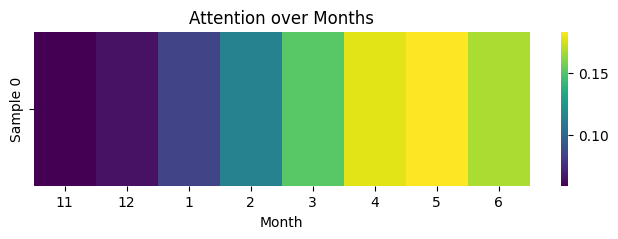

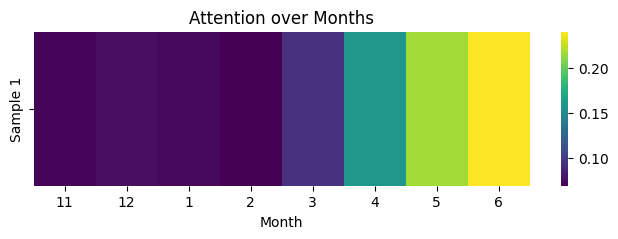

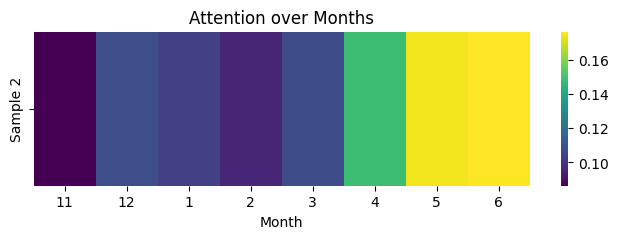

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras import backend as K
import optuna

# =================== 数据准备 ===================
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']
features_all = [f"{var}_{month}" for month in months for var in variables]

X = df[features_all].values.reshape(-1, len(months), len(variables))  # (样本数, 8, 4)
y = df['Drought_Index'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# =================== 指标函数 ===================
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# =================== Attention 层封装 ===================
def attention_layer(inputs):
    score = Dense(1, activation='tanh', name='attention_score')(inputs)
    attention_weights = Lambda(lambda x: tf.nn.softmax(x, axis=1), name='attention_weights')(score)
    context_vector = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1), name='context_vector')([attention_weights, inputs])
    return context_vector, attention_weights

# =================== 模型构建 ===================
def build_model(lstm_units=64, dropout=0.3, learning_rate=0.01):
    inputs = Input(shape=(8, 4))
    lstm_out = LSTM(lstm_units, return_sequences=True)(inputs)
    lstm_out = Dropout(dropout)(lstm_out)

    context_vector, attention_weights = attention_layer(lstm_out)

    x = Dense(32, activation='relu')(context_vector)
    output = Dense(1)(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # attention_model 用于可视化
    attention_model = Model(inputs=inputs, outputs=attention_weights)
    return model, attention_model

# =================== Optuna 调参 ===================
def objective(trial):
    K.clear_session()

    lstm_units = trial.suggest_categorical("lstm_units", [64])
    dropout = trial.suggest_float("dropout", 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    model, _ = build_model(lstm_units, dropout, learning_rate)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              batch_size=16,
              callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
              verbose=0)

    y_pred = model.predict(X_val).flatten()
    return rmse(y_val, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print("\n✅ Optuna 最佳参数：", study.best_params)

# =================== 最佳模型训练 ===================
best_model, attention_model = build_model(**study.best_params)
best_model.fit(X_train, y_train, epochs=100, batch_size=16,
               validation_data=(X_val, y_val),
               callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
               verbose=0)

# =================== 预测 & 评估 ===================
y_pred = best_model.predict(X_val).flatten()
print("\n📊 最佳模型评估指标：")
print("R²:", r2_score(y_val, y_pred))
print("RMSE:", rmse(y_val, y_pred))
print("SMAPE:", smape(y_val, y_pred))

# =================== Attention 可视化 ===================
attention_weights_val = attention_model.predict(X_val)  # shape: (样本数, 8, 1)
attention_weights_val = attention_weights_val.squeeze(-1)  # (样本数, 8)

# 画出指定样本的注意力热图
def plot_attention(sample_idx):
    plt.figure(figsize=(8, 2))
    sns.heatmap(attention_weights_val[sample_idx:sample_idx+1],
                cmap='viridis', cbar=True,
                xticklabels=months, yticklabels=[f'Sample {sample_idx}'])
    plt.title("Attention over Months")
    plt.xlabel("Month")
    plt.show()
# ==================== 7. 提取注意力权重 ====================
attention_time, attention_var = attention_model.predict(X_val)
attention_time = attention_time.squeeze(-1)        # (样本数, 8月)
attention_var = attention_var.squeeze(-1)          # (样本数, 4变量)


# ==================== 8. 保存联合注意力到 CSV ====================
samples = [f"Sample_{i}" for i in range(X_val.shape[0])]
rows = []

for i in range(X_val.shape[0]):
    for m_idx, month in enumerate(months):
        for v_idx, var in enumerate(variables):
            combined_weight = attention_time[i, m_idx] * attention_var[i, v_idx]
            rows.append({
                "Sample": samples[i],
                "Month": month,
                "Variable": var,
                "Attention": combined_weight
            })

df_attention = pd.DataFrame(rows)
df_attention.to_csv("/content/drive/MyDrive/attention_joint_month_var.csv", index=False)
print("✅ 联合注意力 CSV 已保存：/content/drive/MyDrive/attention_joint_month_var.csv")

# ==================== 9. 注意力热图可视化 ====================
pivot = df_attention.groupby(["Month", "Variable"])["Attention"].mean().unstack()

plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title("📊 小麦生长期干旱指数注意力热图")
plt.ylabel("Month")
plt.xlabel("Drought Variable")
plt.tight_layout()
plt.show()


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import optuna

# =================== 数据准备 ===================
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']
features_all = [f"{var}_{month}" for month in months for var in variables]

X = df[features_all].values.reshape(-1, len(months), len(variables))
y = df['Yield'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def dual_attention_layer(inputs):
    # 时间注意力
    time_score = Dense(1, activation='tanh')(inputs)  # (batch, time, 1)
    time_weights = Lambda(lambda x: tf.nn.softmax(x, axis=1), name='time_attention')(time_score)
    time_applied = inputs * time_weights  # (batch, time, features)

    # 变量注意力（在特征维度上）
    transposed = Lambda(lambda x: tf.transpose(x, perm=[0, 2, 1]))(time_applied)  # (batch, features, time)
    var_score = Dense(1, activation='tanh')(transposed)
    var_weights = Lambda(lambda x: tf.nn.softmax(x, axis=1), name='var_attention')(var_score)

    context_vector = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1), name='context_vector')([transposed, var_weights])
    return context_vector, time_weights, var_weights

def build_model(lstm_units=64, dropout=0.3, learning_rate=0.01):
    inputs = Input(shape=(8, 4))
    lstm_out = LSTM(lstm_units, return_sequences=True)(inputs)
    lstm_out = Dropout(dropout)(lstm_out)

    context_vector, time_weights, var_weights = dual_attention_layer(lstm_out)

    x = Dense(32, activation='relu')(context_vector)
    output = Dense(1)(x)

    model = Model(inputs=inputs, outputs=output)
    attention_model = Model(inputs=inputs, outputs=[time_weights, var_weights])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model, attention_model

def objective(trial):
    K.clear_session()

    lstm_units = trial.suggest_categorical("lstm_units", [64])
    dropout = trial.suggest_float("dropout", 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    model, _ = build_model(lstm_units, dropout, learning_rate)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              batch_size=16,
              callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
              verbose=0)

    y_pred = model.predict(X_val).flatten()
    return rmse(y_val, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print("\nOptuna 最佳参数：", study.best_params)

# =================== 最佳模型训练 ===================
best_model, attention_model = build_model(**study.best_params)
best_model.fit(X_train, y_train, epochs=100, batch_size=16,
               validation_data=(X_val, y_val),
               callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
               verbose=0)

# =================== 预测 & 评估 ===================
y_pred = best_model.predict(X_val).flatten()
print("\n最佳模型评估指标：")
print("R²:", r2_score(y_val, y_pred))
print("RMSE:", rmse(y_val, y_pred))
print("SMAPE:", smape(y_val, y_pred))

# =================== 注意力可视化 ===================
time_attn, var_attn = attention_model.predict(X_val)  # shapes: (samples, 8, 1), (samples, 4, 1)
time_attn = time_attn.squeeze(-1)  # (samples, 8)
var_attn = var_attn.squeeze(-1)    # (samples, 4)

# ===== 平均注意力热图（全样本平均） =====
avg_time_attn = np.mean(time_attn, axis=0)
avg_var_attn = np.mean(var_attn, axis=0)


plt.figure(figsize=(8, 1.5))
sns.heatmap(avg_time_attn[np.newaxis, :], cmap='YlGnBu',
            xticklabels=months, yticklabels=["Avg"])
plt.title("Average Time Attention")
plt.show()

plt.figure(figsize=(6, 1.5))
sns.heatmap(avg_var_attn[np.newaxis, :], cmap='YlOrBr',
            xticklabels=variables, yticklabels=["Avg"])
plt.xticks(rotation=45, ha='right')
plt.title("Average Variable Attention")
plt.tight_layout()
plt.show()






[I 2025-05-10 10:43:03,586] A new study created in memory with name: no-name-7327c896-bf0d-486a-b875-dfef2ec41701


In [ ]:
# SHAP解释器
explainer = shap.KernelExplainer(best_model.predict, X_train[:100])  # 选择前100个样本作为背景数据
shap_values = explainer.shap_values(X_val[:10])  # 获取验证集前10个样本的SHAP值

# 绘制SHAP summary plot
shap.summary_plot(shap_values, X_val[:10], feature_names=features_all)
from sklearn.metrics import mean_squared_error

# =================== ±5% Perturbation ===================
def perturbation_shap(X, feature_idx, perturbation=0.05):
    perturbed_X = X.copy()
    perturbed_X[:, feature_idx] *= (1 + perturbation)  # 增加5%的扰动
    y_pred_original = best_model.predict(X)
    y_pred_perturbed = best_model.predict(perturbed_X)
    return mean_squared_error(y_pred_original, y_pred_perturbed)

# 计算每个特征的扰动影响
perturbation_scores = []
for feature_idx in range(X.shape[2]):  # 遍历所有特征
    score = perturbation_shap(X_val, feature_idx)
    perturbation_scores.append(score)

# 打印特征的扰动影响评分
perturbation_scores = np.array(perturbation_scores)
plt.bar(features_all, perturbation_scores)
plt.title("±5% Perturbation Scores")
plt.xticks(rotation=90)
plt.show()

# =================== Permutation Shuffling ===================
def permutation_shuffling(X, y_true, feature_idx):
    X_shuffled = X.copy()
    np.random.shuffle(X_shuffled[:, feature_idx])  # 打乱某个特征列
    y_pred_original = best_model.predict(X)
    y_pred_shuffled = best_model.predict(X_shuffled)
    return mean_squared_error(y_true, y_pred_original) - mean_squared_error(y_true, y_pred_shuffled)

# 计算每个特征的洗牌影响
permutation_scores = []
for feature_idx in range(X.shape[2]):  # 遍历所有特征
    score = permutation_shuffling(X_val, y_val, feature_idx)
    permutation_scores.append(score)

# 打印特征的洗牌影响评分
permutation_scores = np.array(permutation_scores)
plt.bar(features_all, permutation_scores)
plt.title("Permutation Shuffling Scores")
plt.xticks(rotation=90)
plt.show()


NameError: name 'best_model' is not defined

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr  # 比 Pearson 更稳健

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']
features_all = [f"{var}_{month}" for month in months for var in variables]

# 提取特征和目标
X_df = df[features_all]
y = df['Drought_Index']

# 构建一个 dataframe 保存每个 feature 和目标的相关性
corr_result = []
for month in months:
    for var in variables:
        feature_name = f"{var}_{month}"
        corr, _ = spearmanr(X_df[feature_name], y)
        corr_result.append({'Month': month, 'Variable': var, 'Spearman_corr': corr})

corr_df = pd.DataFrame(corr_result)

# 🔥 筛选 6 月的
print("\n📊 6 月各变量对干旱指数的相关性（越高越重要）：")
print(corr_df[corr_df['Month'] == '6'].sort_values(by='Spearman_corr', key=abs, ascending=False))




📊 6 月各变量对干旱指数的相关性（越高越重要）：
   Month  Variable  Spearman_corr
31     6  VCI_mean       0.325822
30     6  TCI_mean       0.309610
28     6       GPP       0.148099
29     6      SMCI       0.109792


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Lambda, Permute, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras import backend as K

# =============== 1. 数据准备 ===============
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11','12','1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']
features_all = [f"{var}_{month}" for month in months for var in variables]

X = df[features_all].values.reshape(-1, len(months), len(variables))  # (样本数, 8, 4)
y = df['Yield'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# =============== 2. 自定义 Attention 层 ===============
def dual_attention(inputs):
    # 时间注意力：在时间维度上 softmax
    time_score = Dense(1, activation='tanh')(inputs)
    time_weights = Lambda(lambda x: tf.nn.softmax(x, axis=1))(time_score)  # (batch, 8, 1)
    time_context = Multiply()([inputs, time_weights])  # (batch, 8, 4)

    # 变量注意力：在变量维度上 softmax
    permuted = Permute((2, 1))(time_context)  # (batch, 4, 8)
    var_score = Dense(1, activation='tanh')(permuted)
    var_weights = Lambda(lambda x: tf.nn.softmax(x, axis=1))(var_score)  # (batch, 4, 1)

    # context vector
    permuted_back = Permute((2, 1))(var_weights)  # (batch, 1, 4)
    context = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1))([time_context, permuted_back])  # (batch, 4)

    return context, time_weights, permuted_back

# =============== 3. 模型构建 ===============
def build_model(lstm_units=64, dropout=0.3, learning_rate=0.001):
    inputs = Input(shape=(8, 4))
    lstm_out = LSTM(lstm_units, return_sequences=True)(inputs)
    lstm_out = Dropout(dropout)(lstm_out)

    context, time_weights, var_weights = dual_attention(lstm_out)

    x = Dense(32, activation='relu')(context)
    output = Dense(1)(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # attention model 用于提取注意力
    attention_model = Model(inputs=inputs, outputs=[time_weights, var_weights])
    return model, attention_model

# =============== 4. 模型训练 ===============
model, attention_model = build_model()

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=100,
          batch_size=16,
          callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
          verbose=0)

# =============== 5. 预测与评估 ===============
y_pred = model.predict(X_val).flatten()

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

print("\n📊 模型评估：")
print("R²:", r2_score(y_val, y_pred))
print("RMSE:", rmse(y_val, y_pred))
print("SMAPE:", smape(y_val, y_pred))

# =============== 6. 提取注意力权重 ===============
attention_time, attention_var = attention_model.predict(X_val)
attention_time = attention_time.squeeze(-1)        # (样本, 8)
attention_var = attention_var.squeeze(1)           # (样本, 4)

# =============== 7. 保存联合注意力为 CSV ===============
samples = [f"Sample_{i}" for i in range(X_val.shape[0])]
rows = []

for i in range(X_val.shape[0]):
    for m_idx, month in enumerate(months):
        for v_idx, var in enumerate(variables):
            combined_weight = attention_time[i, m_idx] * attention_var[i, v_idx]
            rows.append({
                "Sample": samples[i],
                "Month": month,
                "Variable": var,
                "Attention": combined_weight
            })

df_attention = pd.DataFrame(rows)
df_attention.to_csv("/content/drive/MyDrive/attention_joint_month_var.csv", index=False)
print("✅ 注意力 CSV 已保存到 /content/drive/MyDrive/attention_joint_month_var.csv")



5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step

📊 模型评估：
R²: 0.4857623287161952
RMSE: 0.687175383407895
SMAPE: 104.00365304576194
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
✅ 注意力 CSV 已保存到 /content/drive/MyDrive/attention_joint_month_var.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27880 (\N{CJK UNIFIED IDEOGRAPH-6CE8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

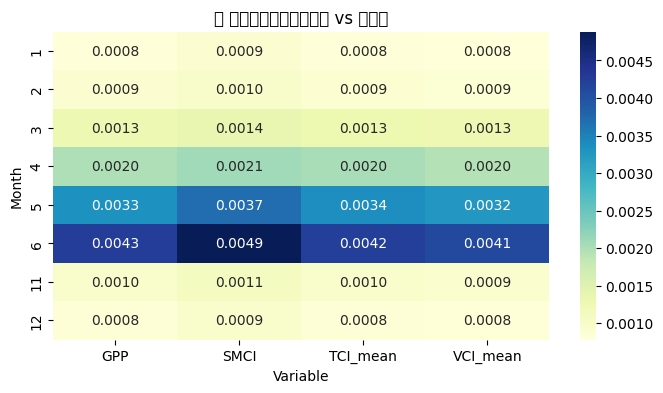

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 读取 CSV
df = pd.read_csv("/content/drive/MyDrive/attention_joint_month_var.csv")

# 2. 计算各月份-变量的平均注意力
pivot = df.groupby(["Month", "Variable"])["Attention"].mean().unstack()


# 4. 绘制热图
plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title("📊 平均注意力权重（月份 vs 变量）")
plt.ylabel("Month")
plt.xlabel("Variable")
plt.show()


1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
R²: 0.3672397705331356
RMSE: 0.7622636966316068
SMAPE: 109.9675747020653
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Attention 权重（第一个样本）:
Month 11: 0.018
Month 12: 0.024
Month 1: 0.036
Month 2: 0.065
Month 3: 0.126
Month 4: 0.215
Month 5: 0.280
Month 6: 0.237

平均 Attention 权重（所有样本）:
Month 11: 0.045
Month 12: 0.050
Month 1: 0.058
Month 2: 0.075
Month 3: 0.107
Month 4: 0.160
Month 5: 0.226
Month 6: 0.281


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas

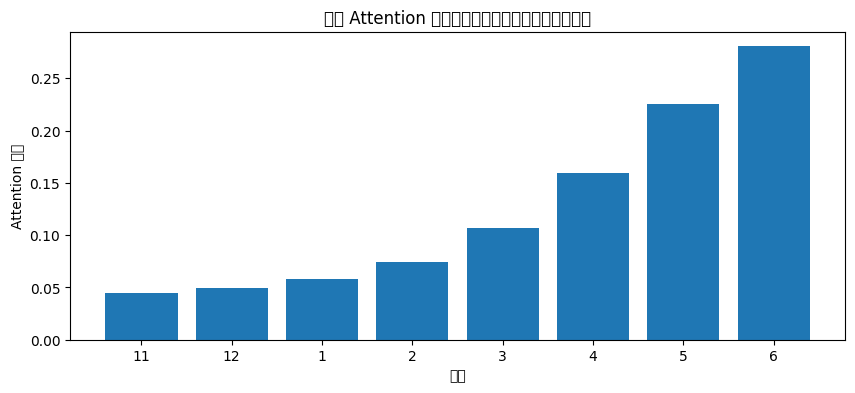

In [ ]:
import pandas as pd
import numpy as np

# 读取数据
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

# 定义月份和变量顺序
months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

# 构造列名（注意顺序）
features_all = [f"{var}_{month}" for month in months for var in variables]
features_all = [f for f in features_all if f in df.columns]

# 特征和标签
X_raw = df[features_all].values
y = df['Yield'].values

# Reshape：样本数, 时间步数, 特征数
X = X_raw.reshape(-1, len(months), len(variables))  # shape = (n_samples, 8, 4)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Layer
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 自定义 Attention 层
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()
        self.dense = tf.keras.layers.Dense(1)

    def call(self, lstm_outputs):
        # lstm_outputs shape: (batch_size, time_steps, hidden_dim)
        scores = self.dense(lstm_outputs)  # shape = (batch_size, time_steps, 1)
        attention_weights = tf.nn.softmax(scores, axis=1)  # shape = (batch_size, time_steps, 1)
        context_vector = tf.reduce_sum(attention_weights * lstm_outputs, axis=1)  # shape = (batch_size, hidden_dim)
        return context_vector, attention_weights

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输入
input_layer = Input(shape=(X.shape[1], X.shape[2]))  # (8, 4)

# LSTM
lstm_out = LSTM(64, return_sequences=True)(input_layer)  # (batch_size, 8, 64)

# Attention
context_vector, attention_weights = AttentionLayer()(lstm_out)  # (batch_size, 64)

# 输出层
dense1 = Dense(32, activation='relu')(context_vector)
output = Dense(1)(dense1)

# 模型
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(0.001), loss='mse')

# 训练
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# 预测
y_pred = model.predict(X_test).flatten()

# 指标
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)) * 100)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("SMAPE:", smape(y_test, y_pred))
# 创建一个模型来输出 attention 权重
attention_model = Model(inputs=model.input, outputs=model.layers[2].output[1])  # 第3层输出的是 attention_weights

# 获取 attention 权重：维度 (n_samples, time_steps, 1)
attention_test = attention_model.predict(X_test)

# 去掉最后一维并归一化（虽然本身是 softmax 后的）
attention_weights_norm = attention_test.squeeze(axis=-1)  # shape = (n_samples, 8)

# attention_weights_norm[i] 表示第 i 个样本，8 个月的注意力权重
# 示例：打印第1个样本的每个月权重
print("Attention 权重（第一个样本）:")
for m, w in zip(months, attention_weights_norm[0]):
    print(f"Month {m}: {w:.3f}")
# 计算所有样本的 attention 权重平均值（用于全局解释）
mean_attention = np.mean(attention_weights_norm, axis=0)

# 打印结果
print("\n平均 Attention 权重（所有样本）:")
for m, w in zip(months, mean_attention):
    print(f"Month {m}: {w:.3f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.bar(months, mean_attention)
plt.title("平均 Attention 权重（越高说明该月对预测越重要）")
plt.ylabel("Attention 权重")
plt.xlabel("月份")
plt.show()


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 2.1400 - val_loss: 1.9111
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4083 - val_loss: 0.9703
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7603 - val_loss: 0.6654
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6560 - val_loss: 0.6353
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6809 - val_loss: 0.6318
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7125 - val_loss: 0.6362
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7072 - val_loss: 0.6341
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6071 - val_loss: 0.6314
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6040 - val_loss: 0.6363
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6883 - val_loss: 0.6344
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6375 - val_loss: 0.6237
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss

<ipython-input-26-4cede23e8255>:126: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-4cede23e8255>:126: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-4cede23e8255>:126: UserWarning: Glyph 40614 (\N{CJK UNIFIED IDEOGRAPH-9EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-4cede23e8255>:126: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-4cede23e8255>:126: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-4cede23e8255>:126: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-4cede23e8255>:126: UserWarning: Glyph 24178 (\N{CJK UNIFIED IDEOGRAPH-5E72}) missing from font(s) 

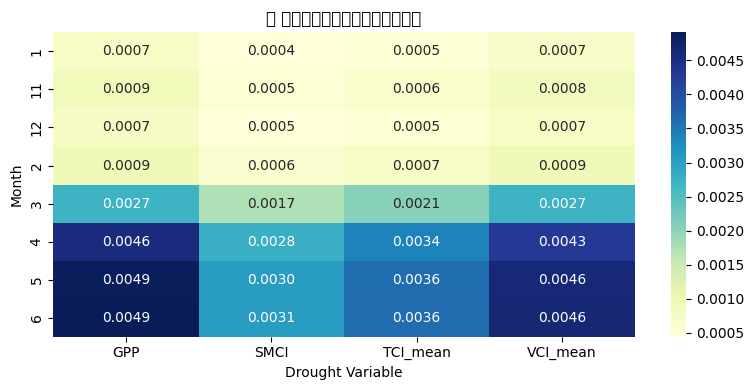

In [ ]:
# ==================== 1. 导入库 ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ==================== 2. 加载并准备数据 ====================
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']  # 小麦生长期（月）
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']  # 干旱相关指数
features_all = [f"{var}_{month}" for month in months for var in variables]

X = df[features_all].values.reshape(-1, len(months), len(variables))  # (样本数, 8月, 4变量)
y = df['Drought_Index'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ==================== 3. 定义联合注意力层 ====================
class DualAttention(Layer):
    def __init__(self):
        super(DualAttention, self).__init__()
        self.time_dense = Dense(1, activation='tanh')
        self.var_dense = Dense(1, activation='tanh')

    def call(self, inputs):
        # 时间注意力
        time_score = self.time_dense(inputs)
        time_weights = tf.nn.softmax(time_score, axis=1)
        time_context = inputs * time_weights

        # 变量注意力
        permuted = tf.transpose(time_context, perm=[0, 2, 1])
        var_score = self.var_dense(permuted)
        var_weights = tf.nn.softmax(var_score, axis=1)

        var_weights_transposed = tf.transpose(var_weights, perm=[0, 2, 1])
        context = tf.reduce_sum(time_context * var_weights_transposed, axis=1)
        return context, time_weights, var_weights

# ==================== 4. 构建模型 ====================
def build_model():
    inputs = Input(shape=(8, 4))
    lstm_out = LSTM(64, return_sequences=True)(inputs)
    lstm_out = Dropout(0.3)(lstm_out)

    context, time_weights, var_weights = DualAttention()(lstm_out)

    x = Dense(32, activation='relu')(context)
    output = Dense(1)(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(0.001), loss='mse')

    attention_model = Model(inputs=inputs, outputs=[time_weights, var_weights])
    return model, attention_model

# ==================== 5. 模型训练 ====================
model, attention_model = build_model()

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=100,
          batch_size=16,
          callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
          verbose=1)

# ==================== 6. 模型评估 ====================
y_pred = model.predict(X_val).flatten()

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

print("\n📊 模型评估：")
print("R²:", r2_score(y_val, y_pred))
print("RMSE:", rmse(y_val, y_pred))
print("SMAPE:", smape(y_val, y_pred))

# ==================== 7. 提取注意力权重 ====================
attention_time, attention_var = attention_model.predict(X_val)
attention_time = attention_time.squeeze(-1)        # (样本数, 8月)
attention_var = attention_var.squeeze(-1)          # (样本数, 4变量)


# ==================== 8. 保存联合注意力到 CSV ====================
samples = [f"Sample_{i}" for i in range(X_val.shape[0])]
rows = []

for i in range(X_val.shape[0]):
    for m_idx, month in enumerate(months):
        for v_idx, var in enumerate(variables):
            combined_weight = attention_time[i, m_idx] * attention_var[i, v_idx]
            rows.append({
                "Sample": samples[i],
                "Month": month,
                "Variable": var,
                "Attention": combined_weight
            })

df_attention = pd.DataFrame(rows)
df_attention.to_csv("/content/drive/MyDrive/attention_joint_month_var.csv", index=False)
print("✅ 联合注意力 CSV 已保存：/content/drive/MyDrive/attention_joint_month_var.csv")

# ==================== 9. 注意力热图可视化 ====================
pivot = df_attention.groupby(["Month", "Variable"])["Attention"].mean().unstack()

plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title("📊 小麦生长期干旱指数注意力热图")
plt.ylabel("Month")
plt.xlabel("Drought Variable")
plt.tight_layout()
plt.show()


Yield as target

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow.keras.backend as K
import os
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

X = df[features_all].values.reshape(-1, len(months), len(variables))
y = df['Drought_Index'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def build_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(8, 3)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

best_r2 = -np.inf
best_model = None

for i in range(10):
    print(f"\n Run {i+1}/10: Training new random model...")
    K.clear_session()

    model = build_model()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
        verbose=0
    )

    y_pred = model.predict(X_val).flatten()
    r2 = r2_score(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred)
    s = smape(y_val, y_pred)

    print(f"➡ R² = {r2:.4f}, RMSE = {rmse:.4f}, SMAPE = {s:.2f}%")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        print("New BEST model found! Saving...")
        model.save_weights("best_weight.weights.h5")

print(f"\n Finished 10 runs. Best R² = {best_r2:.4f} (saved as best_model.h5)")


 Run 1/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
➡ R² = 0.6153, RMSE = 0.2399, SMAPE = 31.81%
New BEST model found! Saving...

 Run 2/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
➡ R² = 0.5630, RMSE = 0.2725, SMAPE = 32.95%

 Run 3/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
➡ R² = 0.5624, RMSE = 0.2729, SMAPE = 33.61%

 Run 4/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
➡ R² = 0.5536, RMSE = 0.2784, SMAPE = 34.30%

 Run 5/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
➡ R² = 0.5785, RMSE = 0.2628, SMAPE = 33.55%

 Run 6/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
➡ R² = 0.5522, RMSE = 0.2792, SMAPE = 33.44%

 Run 7/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
➡ R² = 0.5441, RMSE = 0.2843, SMAPE = 34.11%

 Run 8/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
➡ R² = 0.5561, RMSE = 0.2768, SMAPE = 34.28%

 Run 9/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
➡ R² = 0.5423, RMSE = 0.2854, SMAPE = 34.75%

 Run 10/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
➡ R² = 0.5849, RMSE = 0.2588, SMAPE = 34.43%

 Finished 10 runs. Best R² = 0.6153 (saved as best_model.h5)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

# ========== 读取与预处理数据 ==========
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

# 创建干旱标签（1 = 干旱年, 0 = 正常年）
df['Drought_Label'] = (df['Yield'] < 0).astype(int)

# 构造输入特征
months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

X = df[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df['Drought_Label'].values

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== 构建 LSTM 模型 ==========
def build_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(8, 4)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # 二分类
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 清除旧模型缓存
K.clear_session()
model = build_model()

# ========== 模型训练 ==========
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# ========== 模型预测 ==========
y_pred_prob = model.predict(X_val).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# ========== 模型评估 ==========
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5370 - loss: 0.6887 - val_accuracy: 0.6202 - val_loss: 0.6811
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6795 - loss: 0.6664 - val_accuracy: 0.6279 - val_loss: 0.6627
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6454 - loss: 0.6547 - val_accuracy: 0.5969 - val_loss: 0.6515
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6683 - loss: 0.6131 - val_accuracy: 0.6279 - val_loss: 0.6244
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7099 - loss: 0.5758 - val_accuracy: 0.6589 - val_loss: 0.5872
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7127 - loss: 0.5855 - val_accuracy: 0.6589 - val_loss: 0.5911
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7142 - loss: 0.5453 - val_accuracy: 0.7287 - val_loss: 0.5521
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7491 - loss: 0.5171 - val_accuracy: 0.6667 - val_loss: 0.

In [ ]:
"""
BiLSTM with Attention for Drought Prediction (sequence-to-one, using lag1_DI as static).
"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
def load_lag1_static(csv_path):
    # 加载数据与滞后特征（保持不变）
    df = pd.read_csv(csv_path)
    df['Year'] = df['Season'].astype(str).str.split('-', expand=True)[0].astype(int)
    df = df.sort_values(['Province', 'Year'])
    df['lag1_DI'] = df.groupby('Province')['Drought_Index'].shift(1)
    df = df.dropna().reset_index(drop=True)
    y = df['Drought_Index'].values

    # 定义生长季参数
    months = ['11', '12', '1', '2', '3', '4', '5', '6']  # 生长季月份（11月到次年6月）
    variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']   # 目标变量

    # 构造时序特征
    X = df.drop(columns=['Drought_Index','Yield','Season','Year'], errors='ignore')
    if 'Province' in X.columns:
        X = pd.get_dummies(X, columns=['Province'], drop_first=True)

    # 按生长季月份重组序列
    seqs = []
    for var in variables:
        # 提取该变量所有月份列（例如 GPP_11, GPP_12...GPP_6）
        cols = [f"{var}_{m}" for m in months if f"{var}_{m}" in X.columns]
        if not cols:
            raise ValueError(f"缺少变量 {var} 的月份列，请检查数据列名")
        seqs.append(X[cols].values)

    # 确保形状为 (样本数, 时间步长=8, 变量数=4)
    X_seq = np.stack(seqs, axis=2)  # 输出形状：(n_samples, 8, 4)

    # 提取静态特征（仅lag1_DI）
    static_cols = [c for c in X.columns if c == 'lag1_DI']
    X_stat = X[static_cols].values if static_cols else None

    return X_seq, X_stat, y

def attention_block(inputs):
    # inputs: (batch_size, time_steps, features)
    attention = layers.Dense(1, activation='tanh')(inputs)         # shape: (batch, time, 1)
    attention = layers.Flatten()(attention)                         # shape: (batch, time)
    attention = layers.Activation('softmax')(attention)            # shape: (batch, time)
    attention = layers.RepeatVector(inputs.shape[2])(attention)    # shape: (batch, features, time)
    attention = layers.Permute([2, 1])(attention)                   # shape: (batch, time, features)
    weighted = layers.Multiply()([inputs, attention])              # shape: (batch, time, features)

    # ⛳ 用 Lambda 包裹 reduce_sum
    output = layers.Lambda(lambda x: tf.reduce_sum(x, axis=1))(weighted)  # shape: (batch, features)
    return output


def build_bilstm_attention(input_shape_seq, input_shape_stat=None):
    seq_input = layers.Input(shape=input_shape_seq, name='seq_input')
    x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(seq_input)
    x = attention_block(x)
    inputs = [seq_input]
    if input_shape_stat is not None:
        stat_input = layers.Input(shape=(input_shape_stat,), name='stat_input')
        x = layers.Concatenate()([x, stat_input])
        inputs.append(stat_input)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1, name='output')(x)
    model = models.Model(inputs=inputs, outputs=out)
    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    return model

if __name__ == '__main__':
    csv_path = r"/content/drive/MyDrive/RF/Merged_Seasons_Final.csv"
    X_seq, X_stat, y = load_lag1_static(csv_path)
    X_seq_tr, X_seq_te, X_stat_tr, X_stat_te, y_tr, y_te = train_test_split(
        X_seq, X_stat, y, test_size=0.2, random_state=42)
    # scale
    T, D = X_seq_tr.shape[1], X_seq_tr.shape[2]
    scaler = MinMaxScaler(); flat_tr = X_seq_tr.reshape(-1, D)
    scaler.fit(flat_tr)
    X_seq_tr = scaler.transform(flat_tr).reshape(-1, T, D)
    X_seq_te = scaler.transform(X_seq_te.reshape(-1, D)).reshape(-1, T, D)
    scaler_s = MinMaxScaler(); X_stat_tr = scaler_s.fit_transform(X_stat_tr); X_stat_te = scaler_s.transform(X_stat_te)
    model = build_bilstm_attention((T, D), X_stat_tr.shape[1])
    es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    model.fit([X_seq_tr, X_stat_tr], y_tr, epochs=30, batch_size=16, validation_split=0.1, callbacks=[es], verbose=2)
    y_pred = model.predict([X_seq_te, X_stat_te], verbose=0).flatten()
    mse = mean_squared_error(y_te, y_pred); rmse = np.sqrt(mse); r2 = r2_score(y_te, y_pred)
    smape = 100 * np.mean(2 * np.abs(y_pred - y_te) / (np.abs(y_te) + np.abs(y_pred)))
    print(f"BiLSTM+Attention Model Test -> R2: {r2:.3f}, RMSE: {rmse:.3f}, SMAPE: {smape:.3f}%")

Epoch 1/30
28/28 - 8s - 281ms/step - loss: 1.3125 - rmse: 1.1456 - val_loss: 0.5220 - val_rmse: 0.7225
Epoch 2/30
28/28 - 0s - 18ms/step - loss: 0.5352 - rmse: 0.7316 - val_loss: 0.5185 - val_rmse: 0.7200
Epoch 3/30
28/28 - 0s - 18ms/step - loss: 0.5083 - rmse: 0.7129 - val_loss: 0.4914 - val_rmse: 0.7010
Epoch 4/30
28/28 - 0s - 15ms/step - loss: 0.4950 - rmse: 0.7036 - val_loss: 0.4680 - val_rmse: 0.6841
Epoch 5/30
28/28 - 0s - 10ms/step - loss: 0.4869 - rmse: 0.6978 - val_loss: 0.4502 - val_rmse: 0.6710
Epoch 6/30
28/28 - 0s - 10ms/step - loss: 0.4676 - rmse: 0.6838 - val_loss: 0.4304 - val_rmse: 0.6561
Epoch 7/30
28/28 - 0s - 11ms/step - loss: 0.4587 - rmse: 0.6773 - val_loss: 0.4092 - val_rmse: 0.6397
Epoch 8/30
28/28 - 0s - 10ms/step - loss: 0.4496 - rmse: 0.6705 - val_loss: 0.4153 - val_rmse: 0.6445
Epoch 9/30
28/28 - 0s - 11ms/step - loss: 0.4603 - rmse: 0.6784 - val_loss: 0.3921 - val_rmse: 0.6262
Epoch 10/30
28/28 - 0s - 10ms/step - loss: 0.4494 - rmse: 0.6704 - val_loss: 0.38

BiLSTM+Attention Model Test -> R2: 0.319, RMSE: 0.645, SMAPE: 38.883%


BNN

In [ ]:
!pip install torchbnn
!pip install pyro-ppl scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install torchbnn

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# === 读取数据 ===
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df.dropna(inplace=True)
months   = ['11','12','1','2','3','4','5','6']
vars4    = ['GPP','SMCI','TCI_mean','VCI_mean']
features = [f"{v}_{m}" for m in months for v in vars4]

X = df[features].values.astype(np.float32).reshape(-1,8,4)
y = df['Drought_Index'].values.astype(np.float32)
years = df['Season'].values

# === 指标 ===
def smape(a,b):
    denom = (np.abs(a)+np.abs(b))/2 + 1e-8
    return np.mean(np.abs(a-b)/denom)*100

def eval_metrics(y_true,y_pred):
    return {
      "R2": r2_score(y_true,y_pred),
      "RMSE": mean_squared_error(y_true,y_pred),
      "SMAPE": smape(y_true,y_pred)
    }

# === 构建 MC Dropout LSTM ===
def build_mc_dropout_lstm(drop=0.3):
    m=Sequential([
      LSTM(64, input_shape=(8,4), dropout=drop, recurrent_dropout=drop),
      Dense(32, activation='relu'),
      Dropout(drop),
      Dense(1)
    ])
    m.compile(Adam(1e-2),'mse')
    return m

def mc_predict(m, X, n=100):
    preds=[]
    for _ in range(n):
        preds.append(m(X,training=True).numpy().flatten())
    arr=np.stack(preds,0)
    return arr.mean(0), arr.std(0)

# === 留一年测试循环 ===
results=[]
for year in sorted(np.unique(years)):
    print("Test Year:", year)
    tr = years != year
    te = years == year
    Xtr,Xte = X[tr],X[te]
    ytr,yte = y[tr],y[te]
    # X 标准化
    scaler=MinMaxScaler()
    Xtr_flat=Xtr.reshape(-1,4); Xte_flat=Xte.reshape(-1,4)
    scaler.fit(Xtr_flat); Xtr_flat=scaler.transform(Xtr_flat); Xte_flat=scaler.transform(Xte_flat)
    Xtr=Xtr_flat.reshape(-1,8,4); Xte=Xte_flat.reshape(-1,8,4)
    model = build_mc_dropout_lstm(0.3)
    model.fit(
        Xtr, ytr,
        validation_split=0.1,
        epochs=100,
        batch_size=16,
        callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
        verbose=0
    )

    yp, ys = mc_predict(model,Xte, n=50)
    met=eval_metrics(yte,yp)
    results.append({"Year":year,**met})
    print(met)

# === 汇总 ===
df_res=pd.DataFrame(results)
print(df_res)



Test Year: 2001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


{'R2': -3.234649181365967, 'RMSE': 0.6342964172363281, 'SMAPE': np.float32(72.17282)}
Test Year: 2002


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


{'R2': -2.6178126335144043, 'RMSE': 0.36452189087867737, 'SMAPE': np.float32(52.446312)}
Test Year: 2003


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Exception ignored in: <function _xla_gc_callback at 0x79bf2b3f3d80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


{'R2': -2.165677070617676, 'RMSE': 0.39047127962112427, 'SMAPE': np.float32(41.50389)}
Test Year: 2004


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


{'R2': 0.07676953077316284, 'RMSE': 0.19050516188144684, 'SMAPE': np.float32(25.757656)}
Test Year: 2005


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split

# 读取数据
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

# 只筛选干旱年 (Yield < 0) 和指定区域
df_filtered = df[(df['Yield'] < 0) &
                 (df['Province'].isin(['Kénitra', 'Sidi Kacem', 'Meknes', 'El Hajeb']))]

# 定义月份和变量
months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

# 创建特征列表
features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

# 准备特征和标签
X = df_filtered[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df_filtered['Yield'].values

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义 SMAPE（对称平均绝对百分比误差）
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# 构建LSTM模型
def build_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(8, 4)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # 输出
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

# 训练10次并保存最佳模型
best_r2 = -np.inf
best_model = None

for i in range(10):
    print(f"\n🔁 Run {i+1}/10: Training new random model...")
    K.clear_session()

    model = build_model()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
        verbose=0
    )

    # 预测并评估模型
    y_pred = model.predict(X_val).flatten()
    r2 = r2_score(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred)
    s = smape(y_val, y_pred)

    print(f"➡ R² = {r2:.4f}, RMSE = {rmse:.4f}, SMAPE = {s:.2f}%")

    # 如果当前模型表现更好，则保存
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        print("✨ New BEST model found! Saving...")
        model.save_weights("best_weight.weights.h5")

print(f"\n✅ Finished 10 runs. Best R² = {best_r2:.4f} (saved as best_weight.weights.h5)")




🔁 Run 1/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
➡ R² = 0.3983, RMSE = 0.2274, SMAPE = 40.15%
✨ New BEST model found! Saving...

🔁 Run 2/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
➡ R² = 0.4245, RMSE = 0.2175, SMAPE = 38.91%
✨ New BEST model found! Saving...

🔁 Run 3/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
➡ R² = 0.4756, RMSE = 0.1982, SMAPE = 42.75%
✨ New BEST model found! Saving...

🔁 Run 4/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
➡ R² = 0.3898, RMSE = 0.2307, SMAPE = 38.55%

🔁 Run 5/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
➡ R² = 0.4050, RMSE = 0.2249, SMAPE = 43.29%

🔁 Run 6/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
➡ R² = 0.3948, RMSE = 0.2288, SMAPE = 39.14%

🔁 Run 7/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
➡ R² = 0.4185, RMSE = 0.2198, SMAPE = 40.75%

🔁 Run 8/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
➡ R² = 0.4462, RMSE = 0.2093, SMAPE = 40.84%

🔁 Run 9/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
➡ R² = 0.4282, RMSE = 0.2161, SMAPE = 42.17%

🔁 Run 10/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
➡ R² = 0.4424, RMSE = 0.2108, SMAPE = 42.28%

✅ Finished 10 runs. Best R² = 0.4756 (saved as best_weight.weights.h5)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split

# 载入数据
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

# 定义月份和特征
months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']

features_all = []
for month in months:
    features_all.extend([f"{var}_{month}" for var in variables])

# 构建特征和标签
X = df[features_all].values.reshape(-1, len(months), len(variables))  # shape: (样本数, 8, 4)
y = df['Drought_Index'].values

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# SMAPE指标
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# 构建模型的函数
def build_model():
    model = Sequential()

    # 减少 LSTM 层的复杂度，减少单元数
    model.add(LSTM(32, input_shape=(8, 4), return_sequences=False))  # 减小 LSTM 的单元数

    # 增加 Dropout 防止过拟合
    model.add(Dropout(0.4))  # 增加 Dropout 比率

    # 全连接层
    model.add(Dense(16, activation='relu'))  # 更少的神经元数量

    # 输出层
    model.add(Dense(1))  # 回归问题

    # 编译模型，调节学习率
    model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')  # 学习率略微减小

    return model

# 设置早期停止
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型，进行多次尝试
best_r2 = -np.inf
best_model = None

for i in range(10):
    print(f"\n Run {i+1}/10: Training new random model...")
    K.clear_session()

    model = build_model()

    # 调整训练超参数，减少训练轮数和batch大小
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,  # 减少训练轮数
        batch_size=8,  # 调整批大小
        callbacks=[early_stopping],
        verbose=0
    )

    # 预测
    y_pred = model.predict(X_val).flatten()

    # 评估模型
    r2 = r2_score(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred)  # RMSE需要开根号
    s = smape(y_val, y_pred)

    print(f"➡ R² = {r2:.4f}, RMSE = {rmse:.4f}, SMAPE = {s:.2f}%")

    # 保存最佳模型
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        print("✨ New BEST model found! Saving...")
        model.save_weights("best_weight.weights.h5")

print(f"\n Finished 10 runs. Best R² = {best_r2:.4f} (saved as best_model.h5)")



🔁 Run 1/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
➡ R² = 0.5023, RMSE = 0.3103, SMAPE = 36.85%
✨ New BEST model found! Saving...

🔁 Run 2/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
➡ R² = 0.4618, RMSE = 0.3356, SMAPE = 37.85%

🔁 Run 3/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
➡ R² = 0.4984, RMSE = 0.3128, SMAPE = 36.33%

🔁 Run 4/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
➡ R² = 0.4744, RMSE = 0.3277, SMAPE = 37.78%

🔁 Run 5/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
➡ R² = 0.4892, RMSE = 0.3185, SMAPE = 35.56%

🔁 Run 6/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
➡ R² = 0.4817, RMSE = 0.3232, SMAPE = 37.30%

🔁 Run 7/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
➡ R² = 0.5469, RMSE = 0.2825, SMAPE = 33.11%
✨ New BEST model found! Saving...

🔁 Run 8/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
➡ R² = 0.5067, RMSE = 0.3076, SMAPE = 36.12%

🔁 Run 9/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
➡ R² = 0.4871, RMSE = 0.3198, SMAPE = 36.88%

🔁 Run 10/10: Training new random model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
➡ R² = 0.4967, RMSE = 0.3138, SMAPE = 37.00%

✅ Finished 10 runs. Best R² = 0.5469 (saved as best_model.h5)


XGBoost ➡ R² = 0.6711, RMSE = 0.2051, SMAPE = 28.29%


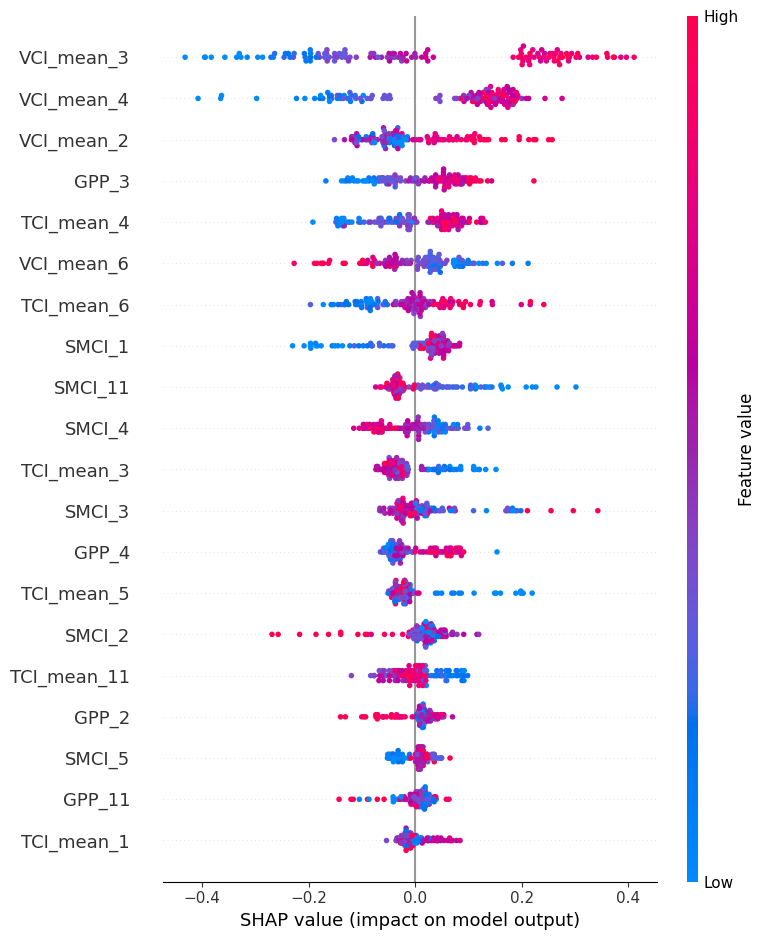

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap
import numpy as np
import pandas as pd

# 载入数据
df = pd.read_csv("/content/drive/MyDrive/RF/Merged_Seasons_Final.csv")
df = df.dropna()

# 特征构建（直接32列）
months = ['11', '12', '1', '2', '3', '4', '5', '6']
variables = ['GPP', 'SMCI', 'TCI_mean', 'VCI_mean']
features_all = [f"{var}_{month}" for month in months for var in variables]

X = df[features_all].values
y = df['Drought_Index'].values

# 划分数据
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练 XGBoost
model = xgb.XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# 预测与评估
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred)
smape = np.mean(np.abs(y_val - y_pred) / ((np.abs(y_val) + np.abs(y_pred)) / 2)) * 100

print(f"XGBoost ➡ R² = {r2:.4f}, RMSE = {rmse:.4f}, SMAPE = {smape:.2f}%")

# SHAP 可解释性分析
explainer = shap.Explainer(model)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, features=X_val, feature_names=features_all)


In [ ]:
!pip install climate-indices


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
